In [ ]:
!pip install fosforml
!pip install scikit-learn==1.5.2

In [ ]:
pip uninstall scikit-learn -y

In [ ]:
["cloudpickle<3,>=2.2"->[3.8, 3.10, 3.11], 
 "pandas<3,>=1.0.0"->[3.8, 3.10, 3.11], 
 "snowflake-ml-python<2,>=1.5"->[3.8, 3.10, 3.11], 
 "scikit-learn<2,>=1.5"->[3.10, 3.11], 
 "snowflake-snowpark-python<2,>=1.11.1"->[3.8, 3.10, 3.11],
 "typing-extensions<5,>=4.1.0"->[3.8, 3.10, 3.11], 
 "numpy<2,>=1.23"->[3.8, 3.10, 3.11], "anyio<4,>=3.5.0"->[3.8, 3.10, 3.11], 
 "pyyaml<7,>=6.0"->[3.8, 3.10, 3.11], "packaging<24,>=20.9"->[3.8, 3.10, 3.11],
 "absl-py<2,>=0.15"->[3.8, 3.10, 3.11]]

In [3]:
from fosforml.model_manager.snowflakesession import get_session
my_session = get_session()

In [4]:
table_name = 'SALARY_DATA'
sf_df = my_session.sql("select * from {}".format(table_name))
salaryDataset =  sf_df.to_pandas()
salaryDataset

,YEARSEXPERIENCE,SALARY
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [5]:
X = salaryDataset[["YEARSEXPERIENCE"]]
y = salaryDataset[["SALARY"]]

In [6]:
#from sklearn.preprocessing import train_test_split
import sklearn.preprocessing
from sklearn.model_selection import train_test_split
#help(sklearn.model_selection.train_test_split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [7]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
#help(model)

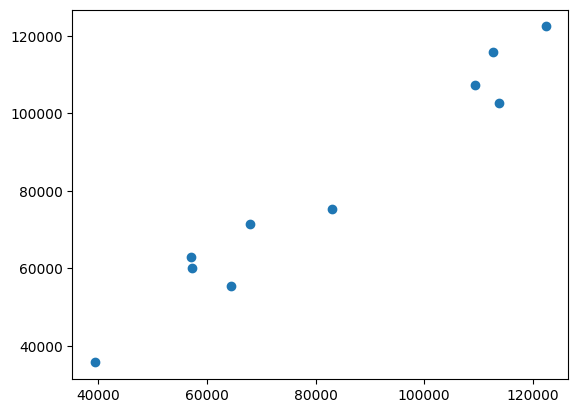

In [8]:
import matplotlib.pyplot as plt

plt.scatter(y_test,y_pred)
plt.show()

In [9]:
from fosforml import register_model

In [10]:
import pandas as pd
y_pred_df = pd.DataFrame(y_pred , columns = ['salary_pred'])
y_pred_df

,salary_pred
0,115814.307562
1,71511.925348
2,102617.853286
3,75282.340855
4,55487.659440
5,60200.678825
6,122412.534701
7,107330.872670
8,63028.490456
9,35692.978025


In [12]:
register_model(
  model_obj=model,
  session=my_session,
  x_train=X_train,
  y_train=y_train,
  x_test=X_test,
  y_test=y_test,
  y_pred=y_pred_df,
  source="Notebook",
  dataset_name="SALARY_DATA",
  dataset_source="Snowflake",
  name="Salary_Prediction",
  description="This model is to predict the salary based on experinece",
  flavour="sklearn",
  model_type="regression",
  conda_dependencies=["scikit-learn==1.5.2"]
)

Calculating build time metrics

Progress: ██████████████████                                                     25.0%


Calculating build time metrics

Progress: ███████████████████████████████████                                    50.0%
Calculating build time metrics

Progress: ████████████████████████████████████████████████████                   75.0%
Calculating build time metrics

Progress: ██████████████████████████████████████████████████████████████████████ 100.0%


'Failed to register model \'MODEL_46A4093A_1F96_4004_BC9D_7FA7357542FB_FDC_SALARY_PREDICTION\'. (1300) (1304): 391546 (XX000): SQL compilation error: Cannot create a Python function with the specified packages. Please check your packages specification and try again. \'One or more package conflicts were detected.\'. Hint: These packages are available in other python runtimes:["cloudpickle<3,>=2.2"->[3.8, 3.10, 3.11], "pandas<3,>=1.0.0"->[3.8, 3.10, 3.11], "snowflake-ml-python<2,>=1.5"->[3.8, 3.10, 3.11], "scikit-learn<2,>=1.5"->[3.10, 3.11], "snowflake-snowpark-python<2,>=1.11.1"->[3.8, 3.10, 3.11], "typing-extensions<5,>=4.1.0"->[3.8, 3.10, 3.11], "numpy<2,>=1.23"->[3.8, 3.10, 3.11], "anyio<4,>=3.5.0"->[3.8, 3.10, 3.11], "pyyaml<7,>=6.0"->[3.8, 3.10, 3.11], "packaging<24,>=20.9"->[3.8, 3.10, 3.11], "absl-py<2,>=0.15"->[3.8, 3.10, 3.11]].'

In [24]:
X_test.to_csv('salary_testing_data.csv')

In [8]:
##import cloudpickle
#import sklearn
import yaml
import packaging
import importlib.metadata
import anyio
import pandas
import numpy
print(importlib.metadata.version('anyio'))
#print(cloudpickle.__version__)
#print(sklearn.__version__)
print(yaml.__version__)
print(packaging.__version__)
print(pandas.__version__)
print(numpy.__version__)


4.4.0
6.0.1
24.1
2.2.0
1.26.4


In [61]:
# import pickle

# serialized_model = pickle.dumps(model)

In [70]:
# from snowflake.ml.registry import Registry

# registry = Registry(session=session, database_name=current_db, schema_name=current_schema)
# registry.log_model(
#     model_name="Salary_Prediction_Model",
#     model=model,
#     version_name = "V1",
#     comment="A simple linear regression model",
#     sample_input_data = [[5.2]]
# )
# #help(Registry.log_model)

c:\Users\chauh\AppData\Local\Programs\Python\Python38\lib\contextlib.py:113: UserWarning: `relax_version` is not set and therefore defaulted to True. Dependency version constraints relaxed from ==x.y.z to >=x.y, <(x+1). To use specific dependency versions for compatibility, reproducibility, etc., set `options={'relax_version': False}` when logging the model.
  return next(self.gen)


In [11]:
# Install snowflake-ml-python
from snowflake.ml.registry import registry

reg = registry.Registry(session=my_session, database_name='AMAZON_DB', schema_name='AMAZON_SCHEMA')
mv = reg.get_model("SALARY_PREDICTION_MODEL").version('V1')
mv.run([[10.2]], function_name='PREDICT')

,output_feature_0
0,121469.930824
